In [25]:
import glob
from math import ceil
import os
from pprint import pprint
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_dir = "../domain_shift_results"

# experiments still in process; ignore any existing results for these.
in_process_expts = [
    "acsfoodstamps_region",
    "acsincome_region",
    "acspubcov_year",
    "acsunemployment_year",
    'diabetes_admtype',  # not in progress - we just want to exclude from results (removed from benchmark)
    'mimic_extract_los_3_ins',
    'mooc_course'
]

In [26]:
def extract_task_from_filepath(fp:str)->str:
    task = re.search(".*/domain_shift_results/(\w+)/.*", fp).group(1)
    return task

# a list of RGB values for categorical plotting
rgblist = list(sns.color_palette("colorblind", 8))

In [4]:
files = []

for expt in os.listdir(results_dir):
    if expt in in_process_expts:
        print(f"skipping in progress expt at {expt}")
        continue
    wc = os.path.join(results_dir, expt, "**", "**_full.csv")
    full_results = glob.glob(wc)
    if full_results:
        most_recent_result = full_results[-1]
        print(f"got recent result file for expt {expt}")
        files.append(most_recent_result)

got recent result file for expt anes_year
skipping in progress expt at acsfoodstamps_region
got recent result file for expt brfss_diabetes_race
skipping in progress expt at acsincome_region
got recent result file for expt anes_region
got recent result file for expt nhanes_lead_poverty
skipping in progress expt at mimic_extract_los_3_ins
skipping in progress expt at mooc_course
got recent result file for expt _debug
got recent result file for expt physionet_set
got recent result file for expt diabetes_admsrc
skipping in progress expt at diabetes_admtype
skipping in progress expt at acspubcov_year
got recent result file for expt nhanes_cholesterol_race
skipping in progress expt at acsunemployment_year
got recent result file for expt mimic_extract_mort_hosp_ins
got recent result file for expt brfss_blood_pressure_income


In [5]:
dfs = []
for f in files:
    df = pd.read_csv(f)
    task = extract_task_from_filepath(f)
    df["task"] = task
    dfs.append(df)

In [6]:
len(dfs)

10

In [7]:
df = pd.concat(dfs)
df['domain_split_ood_values'] = df['domain_split_ood_values'].apply(lambda x: str(x).replace("'", ""))
df['domain_split_id_values'] = df['domain_split_id_values'].apply(lambda x: str(x).replace("'", ""))
df['ood_id_test_accuracy_gap'] = df['ood_test_accuracy'] - df['id_test_accuracy']
df

,train-auc,train-map,validation-auc,validation-map,id_test-auc,id_test-map,ood_test-auc,ood_test-map,ood_validation-auc,ood_validation-map,...,_time_this_iter_s,_training_iteration,should_checkpoint,config/train_loop_config/d_hidden,config/train_loop_config/dropouts,config/train_loop_config/lr,config/train_loop_config/n_epochs,config/train_loop_config/num_layers,config/train_loop_config/weight_decay,ood_id_test_accuracy_gap
0,0.859967,0.902029,0.881125,0.925866,0.872542,0.919961,0.894500,0.934414,0.902139,0.939591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028962
1,0.805127,0.856644,0.823616,0.882994,0.811675,0.870999,0.852571,0.905029,0.841470,0.905356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047115
2,0.747346,0.829408,0.708851,0.825744,0.709987,0.826910,0.681453,0.824842,0.663097,0.827163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037059
3,0.802530,0.855615,0.814410,0.878067,0.800995,0.866320,0.853459,0.909304,0.875131,0.928597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023341
4,0.675308,0.779708,0.668050,0.789081,0.669585,0.795185,0.665199,0.798295,0.669186,0.807106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
96,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
97,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
98,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [8]:
print(sorted(df.task.unique()))
print(sorted(df.columns))

['_debug', 'anes_region', 'anes_year', 'brfss_blood_pressure_income', 'brfss_diabetes_race', 'diabetes_admsrc', 'mimic_extract_mort_hosp_ins', 'nhanes_cholesterol_race', 'nhanes_lead_poverty', 'physionet_set']
['_time_this_iter_s', '_timestamp', '_training_iteration', 'config/params/alpha', 'config/params/colsample_bylevel', 'config/params/colsample_bytree', 'config/params/gamma', 'config/params/lambda', 'config/params/learning_rate', 'config/params/max_bin', 'config/params/max_depth', 'config/params/min_child_samples', 'config/params/min_child_weight', 'config/params/reg_alpha', 'config/params/reg_lambda', 'config/params/subsample', 'config/train_loop_config/d_hidden', 'config/train_loop_config/dropouts', 'config/train_loop_config/lr', 'config/train_loop_config/n_epochs', 'config/train_loop_config/num_layers', 'config/train_loop_config/weight_decay', 'date', 'domain_split_id_values', 'domain_split_ood_values', 'domain_split_varname', 'done', 'episodes_total', 'estimator', 'experiment_

In [9]:
df[['task', 'estimator', 'validation_accuracy']]

,task,estimator,validation_accuracy
0,anes_year,xgb,0.823033
1,anes_year,xgb,0.795159
2,anes_year,xgb,0.692463
3,anes_year,xgb,0.794242
4,anes_year,xgb,0.700165
...,...,...,...
95,brfss_blood_pressure_income,lightgbm,1.000000
96,brfss_blood_pressure_income,lightgbm,1.000000
97,brfss_blood_pressure_income,lightgbm,1.000000
98,brfss_blood_pressure_income,lightgbm,1.000000


In [11]:
def best_by_metric(df_in, metric='validation_accuracy'):
    df_out = df_in.groupby(['task', 'estimator', 'domain_split_ood_values'])\
               .apply(lambda group: group.nlargest(1, columns=metric))\
               .reset_index(drop=True)
    
    # check the outputs
    group_sizes = df_out.groupby(['task', 'estimator', 'domain_split_ood_values']).size()
    if not np.all(group_sizes.values == 1):
        print(group_sizes)
        raise ValueError("got unexpected results - more than one observation per group.")
    return df_out

In [12]:
best_acc_per_task = best_by_metric(df)
best_acc_per_task[['validation_accuracy', 'task', 'estimator', 'domain_split_ood_values']]

,validation_accuracy,task,estimator,domain_split_ood_values
0,0.730337,_debug,mlp,"[A44, A410, A45, A46, A48]"
1,0.808989,_debug,xgb,"[A44, A410, A45, A46, A48]"
2,0.902616,anes_region,lightgbm,[1.0]
3,0.885350,anes_region,lightgbm,[2.0]
4,0.911538,anes_region,lightgbm,[3.0]
...,...,...,...,...
60,0.977642,nhanes_lead_poverty,xgb,[1.0]
61,0.978740,physionet_set,lightgbm,[a]
62,0.978779,physionet_set,lightgbm,[b]
63,0.978904,physionet_set,xgb,[a]


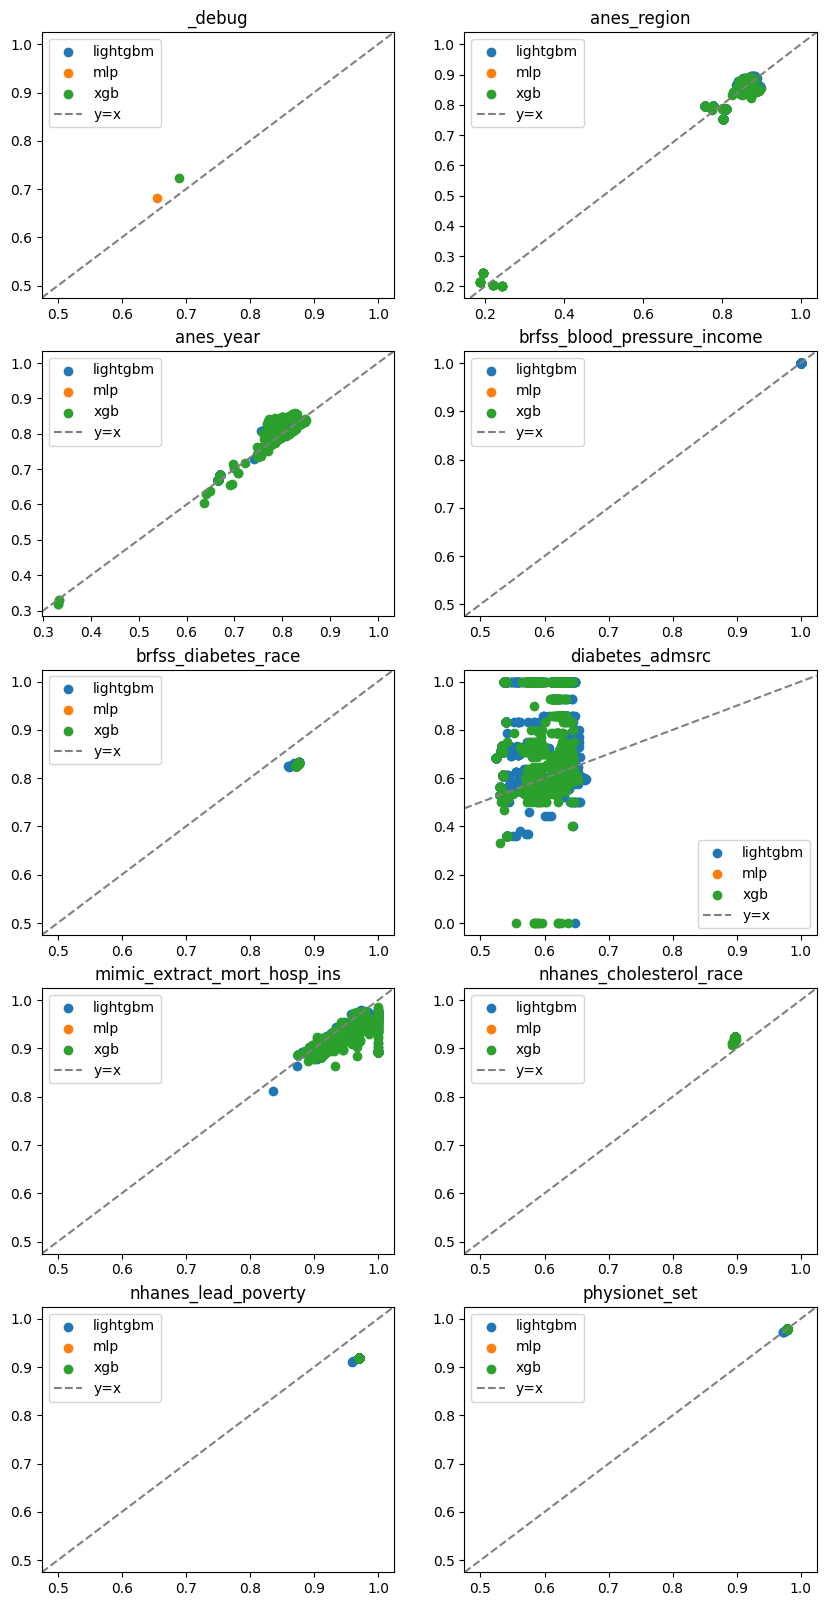

In [14]:
tasks = sorted(df.task.unique())

fig, axs = plt.subplots(ncols=2, nrows=ceil(len(tasks)/2), figsize=(10,20))
for i, task in enumerate(tasks):
    rownum = i // 2
    colnum = i % 2
    ax = axs[rownum,colnum]
    for est in sorted(df.estimator.unique()):
        df_ = df.query(f"estimator == '{est}' and task == '{task}'")
        ax.scatter(df_['id_test_accuracy'].values, df_['ood_test_accuracy'].values, label=est)
    ax.axline((0.5,0.5), (1, 1), linestyle="dashed", color="grey", label="y=x")
    ax.legend()
    
    ax.set_title(task)

In [19]:
estimators

['lightgbm', 'mlp', 'xgb']

1
1
1
1
1
1
1
1


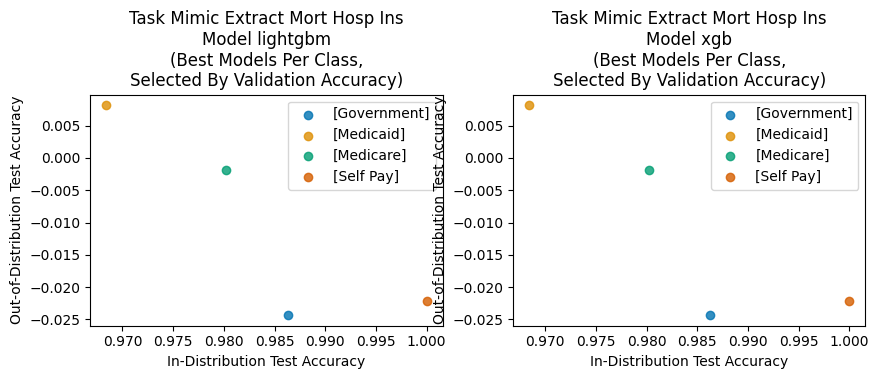

In [31]:
# fig, axs = plt.subplots(ncols=2, nrows=ceil(len(tasks)/2), figsize=(10,20))
# for i, task in enumerate(tasks):

task = 'mimic_extract_mort_hosp_ins'

# estimators = sorted(df.estimator.unique())
estimators = ('xgb', 'lightgbm')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

for i, estimator in enumerate(estimators):
    ax = axs[i-1]
    df_ = best_acc_per_task.query(f"estimator == '{est}' and task == '{task}'")
    for j, ood_vals in enumerate(df_['domain_split_ood_values'].unique()):
        tmp = df_.query(f"domain_split_ood_values == '{ood_vals}'")
        print(len(tmp))
        ax.scatter(tmp['id_test_accuracy'].values, 
#                     tmp['ood_test_accuracy'].values,
                    tmp['ood_id_test_accuracy_gap'],
                    label=ood_vals,
                   color=rgblist[j],
                    alpha=0.8)
# xymin = min(df_['id_test_accuracy'].values.min(),
#             df_['ood_test_accuracy'].values.min())
# xymax = max(df_['id_test_accuracy'].values.max(),
#             df_['ood_test_accuracy'].values.max())
    ax.set_xlabel("In-Distribution Test Accuracy")
    ax.set_ylabel("Out-of-Distribution Test Accuracy")
    ax.set_title(f"Task {task.replace('_', ' ').title()}\nModel {estimator}\n(Best Models Per Class,\nSelected By Validation Accuracy)")
    ax.legend()
# plt.axline( (xymin, xymin), (xymax, xymax), linestyle="dashed", color="grey", label="y=x")

In [50]:
best_acc_per_task.query(f"task == '{task}'").set_index(
    keys=['task', 'domain_split_ood_values', 'estimator']
)[['validation_accuracy', 'id_test_accuracy', 'ood_test_accuracy', 'ood_id_test_accuracy_gap']]\
.sort_index(level=[-2])

validation_accuracy  \
task                        domain_split_ood_values estimator                        
mimic_extract_mort_hosp_ins [Government]            lightgbm              0.986301   
                                                    xgb                   0.986301   
                            [Medicaid]              lightgbm              0.989474   
                                                    xgb                   0.989474   
                            [Medicare]              lightgbm              0.965019   
                                                    xgb                   0.981749   
                            [Self Pay]              lightgbm              0.933333   
                                                    xgb                   0.966667   

                                                               id_test_accuracy  \
task                        domain_split_ood_values estimator                     
mimic_extract_mort_hosp_ins [Government]            lightgbm           1.000000   
                                                    xgb                0.986301   
                            [Medicaid]              lightgbm           0.973684   
                                                    xgb                0.968421   
                            [Medicare]              lightgbm           0.949088   
                                                    xgb                0.980243   
                            [Self Pay]              lightgbm           1.000000   
                                                    xgb                1.000000   

                                                               ood_test_accuracy  \
task                        domain_split_ood_values estimator                      
mimic_extract_mort_hosp_ins [Government]            lightgbm            0.968037   
                                                    xgb                 0.961948   
                            [Medicaid]              lightgbm            0.978337   
                                                    xgb                 0.976581   
                            [Medicare]              lightgbm            0.951331   
                                                    xgb                 0.978369   
                            [Self Pay]              lightgbm            0.970370   
                                                    xgb                 0.977778   

                                                               ood_id_test_accuracy_gap  
task                        domain_split_ood_values estimator                            
mimic_extract_mort_hosp_ins [Government]            lightgbm                  -0.031963  
                                                    xgb                       -0.024353  
                            [Medicaid]              lightgbm                   0.004653  
                                                    xgb                        0.008160  
                            [Medicare]              lightgbm                   0.002243  
                                                    xgb                       -0.001874  
                            [Self Pay]              lightgbm                  -0.029630  
                                                    xgb                       -0.022222